# Відрізок інтерполяції розбити не менш ніж на 10 вузлів.
Використовуючи аналітичне задання функції, визначене варіантом, побудувати таблицю значень функції у вузлах на відповідному відрізку інтерполяції (табл.5.1).

Побудувати за таблично заданою функцією:
- інтерполяційний поліном P_n(X) у формі Ньютона або Лагранжа;
- здійснити інтерполяцію сплайнами (другого чи третього порядку);
- побудувати графік похибки інтерполяції.

Примітка. У даному практикумі функція, яка інтерполюється, задана аналітично, отже, похибку
інтерполяції можна визначити безпосередньо як максимум різниць між значеннями точної функції
та інтерполюючої функції у ряді точок (точки не повинні співпадати із вузлами інтерполяції).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(x):
    return 1 / np.sin(x)**2 - 1

In [3]:
n = 10
x = np.linspace(np.pi/6, np.pi/2, n)
y = func(x)
x, y

(array([0.52359878, 0.63995406, 0.75630934, 0.87266463, 0.98901991,
        1.10537519, 1.22173048, 1.33808576, 1.45444104, 1.57079633]),
 array([3.        , 1.80427519, 1.12346873, 0.70408819, 0.4325829 ,
        0.2522238 , 0.13247433, 0.05617106, 0.01366169, 0.        ]))

# Інтерполяційний поліном P_n(X) у формі Ньютона

In [4]:
def f(Xs_indexes: np.ndarray, Xs_values: np.ndarray, ys_values: np.ndarray):
    if len(Xs_indexes) == 2:
        i, j = Xs_indexes
        return (ys_values[j] - ys_values[i]) / (Xs_values[j] - Xs_values[i])
    return (f(Xs_indexes[1:], Xs_values, ys_values) - f(Xs_indexes[:-1], Xs_values, ys_values)) / (Xs_values[Xs_indexes[-1]] - Xs_values[Xs_indexes[0]])

def Newton_polynomial(x: np.ndarray, y: np.ndarray, x_eval=None, info=False):
    if x_eval is not None:
        result = y[0]
        for i in range(1, x.shape[0]):
            temp = 1
            for xi in x[:i]:
                temp *= (x_eval - xi)
            result += f(np.arange(i + 1), x, y) * temp
    else:
        result = f"{y[0]}"
        for i in range(1, x.shape[0]):
            text = ""
            for xi in x[:i]:
                text += f" * (x - {xi})"
            result += " + " + str(f(np.arange(i + 1), x, y)) + text
        if info:
            print("P_n(x) = ", result, sep="", end="")
    return result


In [5]:
if n < 30:
    print(Newton_polynomial(x, y))
    

3.000000000000001 + -10.276497761975135 * (x - 0.5235987755982988) + 19.016743680821826 * (x - 0.5235987755982988) * (x - 0.6399540590645875) + -26.819791403331685 * (x - 0.5235987755982988) * (x - 0.6399540590645875) * (x - 0.7563093425308761) + 31.81204336195699 * (x - 0.5235987755982988) * (x - 0.6399540590645875) * (x - 0.7563093425308761) * (x - 0.8726646259971648) + -32.47837279282785 * (x - 0.5235987755982988) * (x - 0.6399540590645875) * (x - 0.7563093425308761) * (x - 0.8726646259971648) * (x - 0.9890199094634534) + 29.378890431018107 * (x - 0.5235987755982988) * (x - 0.6399540590645875) * (x - 0.7563093425308761) * (x - 0.8726646259971648) * (x - 0.9890199094634534) * (x - 1.105375192929742) + -23.83201601575641 * (x - 0.5235987755982988) * (x - 0.6399540590645875) * (x - 0.7563093425308761) * (x - 0.8726646259971648) * (x - 0.9890199094634534) * (x - 1.105375192929742) * (x - 1.2217304763960306) + 17.591094111234998 * (x - 0.5235987755982988) * (x - 0.6399540590645875) * (x 

# Здійснити інтерполяцію сплайнами (другого чи третього порядку)

In [6]:
def cubic_spline(x: np.ndarray, y: np.ndarray, x_eval: np.ndarray):
    n = len(x)
    h = np.diff(x)

    A = np.zeros((n, n))
    A[0, 0] = 1
    A[-1, -1] = 1
    for i in range(1, n - 1):
        A[i, i - 1] = h[i - 1]
        A[i, i]     = 2 * (h[i - 1] + h[i])
        A[i, i + 1] = h[i]

    b = np.zeros(n)
    for i in range(1, n - 1):
        b[i] = 3 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1])

    c = np.linalg.solve(A, b)

    a = y[:-1]
    b = np.zeros(n - 1)
    d = np.zeros(n - 1)
    for i in range(n - 1):
        b[i] = (y[i + 1] - y[i]) / h[i] - h[i] * (2 * c[i] + c[i + 1]) / 3
        d[i] = (c[i + 1] - c[i]) / (3 * h[i])

    spline_vals = np.zeros_like(x_eval, dtype=float)
    for idx, xi in enumerate(x_eval):
        i = np.searchsorted(x, xi) - 1
        i = max(min(i, n - 2), 0)
        dx = xi - x[i]
        spline_vals[idx] = a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3

    return spline_vals


# Побудувати графік похибки інтерполяції

In [7]:
x_dense = np.linspace(np.pi/6, np.pi/2, int(1e4))
x_dense = x_dense[~np.isin(x_dense, x)]
f_dense = func(x_dense)
P_dense = Newton_polynomial(x, y, x_dense)
S_dense = cubic_spline(x, y, x_dense)

error_newtone = np.abs(f_dense - P_dense)
error_spline = np.abs(f_dense - S_dense)

print("Таблиця значень функції у вузлах:")
print("X |", " | ".join(map(str, np.round(x, 5))))
print("f |", " | ".join(map(str, np.round(y, 5))))
# for xi, yi in zip(x, y):
#     print(f"x = {xi:.5f}, f(x) = {yi:.5f}")

Таблиця значень функції у вузлах:
X | 0.5236 | 0.63995 | 0.75631 | 0.87266 | 0.98902 | 1.10538 | 1.22173 | 1.33809 | 1.45444 | 1.5708
f | 3.0 | 1.80428 | 1.12347 | 0.70409 | 0.43258 | 0.25222 | 0.13247 | 0.05617 | 0.01366 | 0.0


Максимальна похибка Ньютона: 4.869e-04
Максимальна похибка сплайну: 4.849e-02


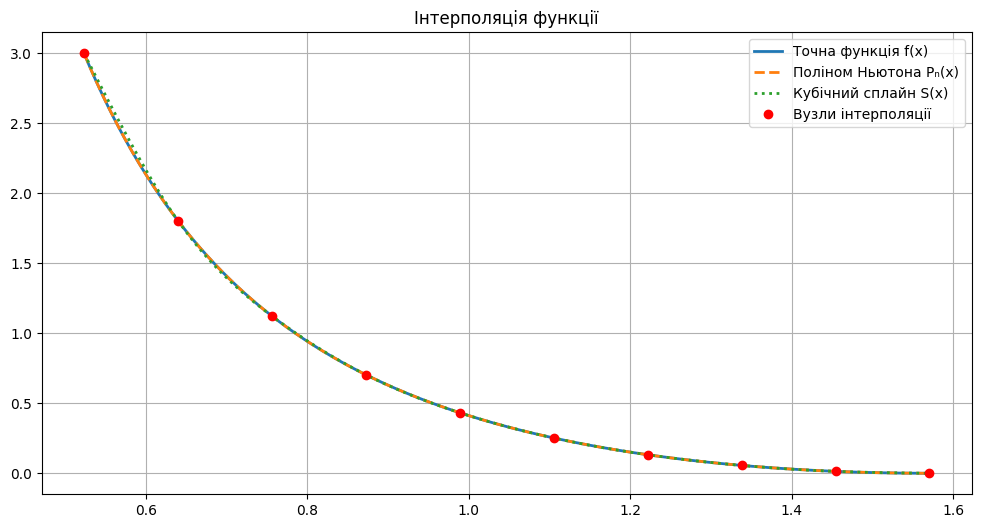

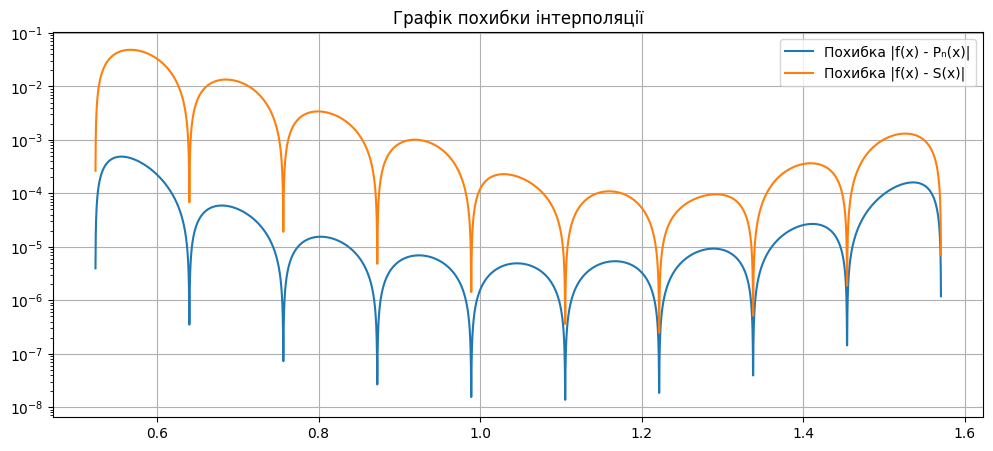

In [8]:
print(f"Максимальна похибка Ньютона: {np.max(error_newtone):.3e}")
print(f"Максимальна похибка сплайну: {np.max(error_spline):.3e}")

plt.figure(figsize=(12, 6))
plt.plot(x_dense, f_dense, label='Точна функція f(x)', linewidth=2)
plt.plot(x_dense, P_dense, '--', label='Поліном Ньютона Pₙ(x)', linewidth=2)
plt.plot(x_dense, S_dense, ':', label='Кубічний сплайн S(x)', linewidth=2)
plt.plot(x, y, 'ro', label='Вузли інтерполяції')
plt.title("Інтерполяція функції")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(x_dense, error_newtone, label='Похибка |f(x) - Pₙ(x)|')
plt.plot(x_dense, error_spline, label='Похибка |f(x) - S(x)|')
plt.title("Графік похибки інтерполяції")
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()
